In [15]:
import cv2
import numpy as np

## Escalamiento

In [3]:
img = cv2.imread('C:\\Jupyter\\pdi\\imagenes\\mario.jpg')

In [21]:
Sx = 1.2
Sy = 2
img_redimensioanda = cv2.resize(img,None,fx = Sx, fy = Sy)

cv2.imshow("Imagen original", img)
cv2.imshow("Imagen original 2", img)
cv2.imshow("Imagen doble tamano", img_redimensionada)
cv2.waitKey(15000)
cv2.destroyAllWindows()

NameError: name 'img_redimensionada' is not defined

## Traslación

In [20]:
Tx = 50
Ty = 100

# alto, ancho y canal
(h, w, c) = img.shape

matriz_trasnformacion = np.float32([
                                        [1, 0, Tx],
                                        [0, 1, Ty]
                                    ])

img_trasladada = cv2.warpAffine(img, matriz_trasnformacion, (2 * w, 2 * h))

cv2.imshow('Img1', img)
cv2.imshow('Img trasadada', img_trasladada)
cv2.waitKey(10000)
cv2.destroyAllWindows()

## Rotación

In [29]:
centro = (0, 0)
angulo = 30
escala = 1

matriz_trasnformacion = cv2.getRotationMatrix2D(centro, angulo, escala)
print(matriz_trasnformacion)
img_rotada = cv2.warpAffine(img, matriz_trasnformacion, (2 * w, 2 * h))

cv2.imshow('img original', img)
cv2.imshow('img rotada', img_rotada)
cv2.waitKey(10000)
cv2.destroyAllWindows()

[[ 0.8660254  0.5        0.       ]
 [-0.5        0.8660254  0.       ]]


## Composición de trasnformaciones

In [30]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [32]:
imagen = Image.open('C:\\Jupyter\\pdi\\imagenes\\mario.jpg')

In [34]:
print(imagen)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=225x225 at 0x198DBE7AAE0>


[[0.5 0.  0. ]
 [0.  0.5 0. ]
 [0.  0.  1. ]]
[[0.5 0.  0. ]
 [0.  0.5 0. ]]


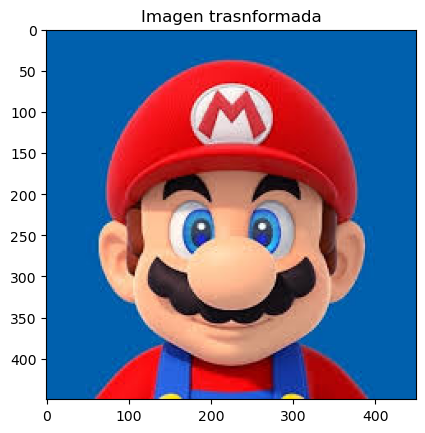

In [47]:
# escalando al doble en ambas coordenadas

w, h = imagen.size
Sx = 2
Sy = 2

matriz_transformacion_1 = np.float32([
                                    [Sx, 0, 0],
                                    [0,  Sy, 0],
                                    [0,  0,  1]
                                    ])

composicion = matriz_transformacion_1
composicion_inversa = np.linalg.inv(composicion)
print(composicion_inversa)
composicion_inversa = composicion_inversa[:-1] ## luego de aplicar la inversa, se elimina la última fila (0, 0, 1)
print(composicion_inversa)
tamano_salida = int(Sx * w), int(Sy * h)
imagen_transformada = imagen.transform(tamano_salida, Image.AFFINE, data = composicion_inversa.flatten()) ## flatern lo conbierte a vector
plt.title('Imagen trasnformada')
plt.imshow(np.array(imagen_transformada))
plt.show()


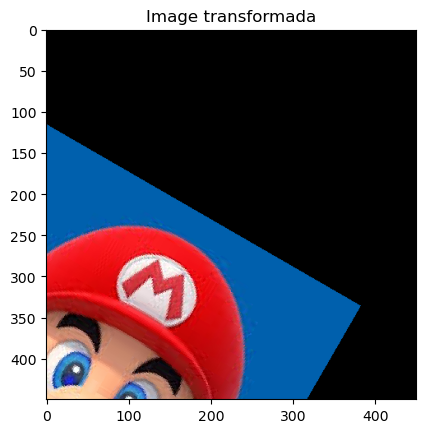

In [48]:
import numpy as np 
from PIL import Image
import matplotlib.pyplot as plt 

image = Image.open('C:\\Jupyter\\pdi\\imagenes\\mario.jpg')
w,h = image.size
########################## ESCALAMIENTO ########################
Sx = 2
Sy = 2

matrix_transformation_1 = np.float32([
										[Sx, 0,  0],
										[0, Sy,  0],
										[0,  0,  1]
									]) 
########################## TRASLACIÓN #########################
Tx = 50
Ty = 100

matrix_transformation_2 = np.float32([
										[1, 0,  Tx],
										[0, 1,  Ty],
										[0,  0,  1]
									]) 
##########################  ROTACIÓN  ##########################
angle = 30
angle = np.radians(angle)

matrix_transformation_3 = np.float32([
										[np.cos(angle), -np.sin(angle),  0],
										[np.sin(angle),  np.cos(angle),  0],
										[0,                          0,  1]
									]) 
###############################################################
composition = matrix_transformation_3@matrix_transformation_2@matrix_transformation_1
composition_inverse = np.linalg.inv(composition)
composition_inverse = composition_inverse[:-1]

output_size = (int(Sx*w),int(Sy*h))
image_transformed = image.transform(output_size,Image.AFFINE,data = composition_inverse.flatten())
plt.title("Image transformada")
plt.imshow(np.array(image_transformed))
plt.show()
#transform(size, method, data=None)
